# First Notebook on a House Price Prediction Model  
# Supervised Machine Learning  

### Given Explanations:
from "data_description-iter-0-2.txt":
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* TotalBsmtSF: Total square feet of basement area
* BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
* Fireplaces: Number of fireplaces
* PoolArea: Pool area in square feet
* GarageCars: Size of garage in car capacity
* WoodDeckSF: Wood deck area in square feet
* ScreenPorch: Screen porch area in square feet*

## 1. Importing modules and .csv:

In [1]:


import pandas as pd
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import make_pipeline
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import plot_tree

housing_classific = pd.read_csv(r'housing-classification-iter-0-2.csv')
# housing_classific.sample(5) # Curiosity 


## 2. Basic Exploration:

In [2]:
# Checking on Data Types and Null´s...:
housing_classific.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
 9   Expensive     1460 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 114.2 KB


Further investigation on the topic showed that LotFrontage, the only column with missing values, plays quite a role.  
Since so, we might consider dropping the whole rows with missing data before we falsify our results when "imputing" on that?!

In [3]:
# Have a look at the column that determines our task:
expensive_houses = housing_classific.pop('Expensive') 
# print(expensive_houses.tolist()) #See that it worked

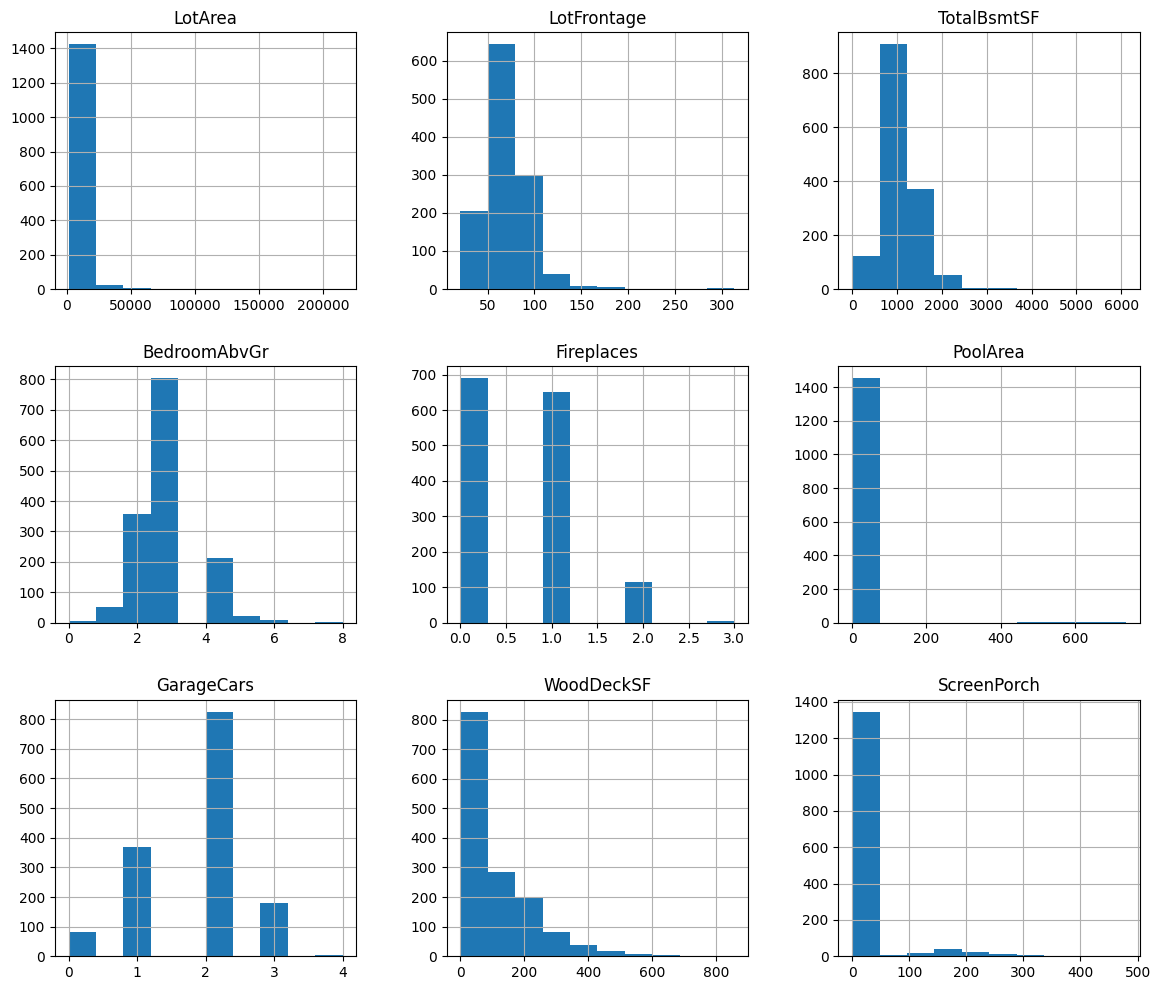

In [4]:
# easy visualization of the column´s values:
housing_classific.hist(figsize=(14, 12));

## 3. Train_Test Split:

In [5]:
# As we learned we have our variables, X for our columns we need to "calculate" to predict the outcome of the popped column "y":
X = housing_classific.copy()
y = expensive_houses.copy()
# Standard "train_test_split", obviously on the best possible random_state seed, test_size is 20%:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [6]:
# Just to understand/control our data - will put most lines in comment for readability:
X_train.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
1220,7800,66.0,912,2,0,0,1,0,0
1285,6000,50.0,780,4,1,0,1,45,0
573,9967,76.0,384,3,1,0,2,100,0
793,9158,76.0,1496,3,0,0,2,168,0
104,7758,NaN,1040,4,2,0,1,0,184


In [7]:
# X_test.head()

In [8]:
# y_train.head()

In [9]:
# y_test.head()

In [10]:
# X_train.shape

In [11]:
# X_test.shape

In [12]:
y_train.shape

(1168,)

In [13]:
# y_test.shape

In [14]:
y_train.value_counts()

0    989
1    179
Name: Expensive, dtype: int64

## 4. First iteration: intuition based model aka Levent = GOAT
### 4.1. 1:1 Translation from titanic data
Derived from our notebook on the titanic we start our model with predicting "all houses are low in value", "pessimistic" so to say...

In [15]:
# As in the notebook for titanic - we just set all houses values to 0 (=not expensive):
pred_pessimistic_train = pd.Series(0, index=y_train.index)
# And look how accurate that is (hint: u can calculate that at 3.)
train_accuracy = accuracy_score(y_true = y_train,
                                 y_pred = pred_pessimistic_train
                                 )
# Can round that to get the decimal percentage:
round(train_accuracy, 2)

0.85

Nothing fancy about that yet, but we can keep that 85% as sort of a "benchmark" for future predictions...  
 No need to test that on our test value, obviously.

### 4.2. Titanic Exercise on Levent´s Sign for expensive properties (GarageCars >= 3)
Thanks to Levent´s insight on the topic, we now know that an expensive house should have place for at least 3 Cars,   
since u **always** need a "backup car".

In [16]:
# Create a new column 'Expensive' and set value = 0 as default:
X_train['Expensive'] = 0
# Change our conditions towards "Levent´s Sign":
X_train.loc[X_train['GarageCars'] >= 3,'Expensive'] = 1
y_train_prediction = X_train.pop('Expensive')

In [17]:
# To have a look at this:
# y_train_prediction.sample(10)

In [18]:
accuracy_score(y_true = y_train, y_pred = y_train_prediction)

0.8981164383561644

In [19]:
# Now on our test data:
X_test['Expensive'] = 0
X_test.loc[X_test['GarageCars'] >= 3,'Expensive'] = 1
y_test_prediction = X_test.pop('Expensive')
# How cool is that, we are already reaching the accuracy our class did with more modelling. GG - Job Done.
accuracy_score(y_true = y_test, y_pred = y_test_prediction)

0.910958904109589

## Conclusion of this notebook:
*  our benchmark for upcoming prediction models is around 90-91% to meet "the way of the Levent".